In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
import glob 

Using TensorFlow backend.


In [18]:
train_path='Dataset/Train'
test_path='Dataset/Test'


In [19]:
print(tf.__version__)

2.1.0


In [20]:
classifier=Sequential()

In [21]:
classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

C:\Users\LaKgos01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [22]:
classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

C:\Users\LaKgos01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [23]:
classifier.add(Dropout(0.2))

In [24]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [25]:
classifier.add(Dropout(0.2))

In [26]:
classifier.add(Flatten())
classifier.add(Dropout(0.2))

In [27]:
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=1,activation='sigmoid'))

C:\Users\LaKgos01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\Users\LaKgos01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [28]:
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
train_datagen=ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
vertical_flip=True)

In [31]:
test_datagen=ImageDataGenerator(
rescale=1./255)

In [32]:
training_set=train_datagen.flow_from_directory('Dataset/Train',
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary',
                                              )

test_set=train_datagen.flow_from_directory('Dataset/Test',
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary',
                                              )

r=classifier.fit_generator(training_set,
             steps_per_epoch=30,
              epochs=30,
              validation_data=test_set,
              validation_steps=20
             )

Found 59 images belonging to 2 classes.
Found 39 images belonging to 2 classes.
Epoch 1/30
30/30 [==============================] - 17s 566ms/step - loss: 0.7801 - accuracy: 0.5480 - val_loss: 0.6287 - val_accuracy: 0.5436
Epoch 2/30
30/30 [==============================] - 16s 530ms/step - loss: 0.4652 - accuracy: 0.7932 - val_loss: 1.2122 - val_accuracy: 0.6000
Epoch 3/30
30/30 [==============================] - 15s 506ms/step - loss: 0.2485 - accuracy: 0.9040 - val_loss: 1.1494 - val_accuracy: 0.6128
Epoch 4/30
30/30 [==============================] - 16s 518ms/step - loss: 0.1530 - accuracy: 0.9503 - val_loss: 1.7629 - val_accuracy: 0.6359
Epoch 5/30
30/30 [==============================] - 16s 522ms/step - loss: 0.1129 - accuracy: 0.9684 - val_loss: 2.0177 - val_accuracy: 0.6872
Epoch 6/30
30/30 [==============================] - 16s 549ms/step - loss: 0.0599 - accuracy: 0.9808 - val_loss: 0.3871 - val_accuracy: 0.6538
Epoch 7/30
30/30 [==============================] - 16s 518ms/

In [33]:
r.history['accuracy']

[0.5480226,
 0.79322034,
 0.9039548,
 0.9502825,
 0.96836156,
 0.980791,
 0.9988701,
 0.99548024,
 0.9932203,
 0.9920904,
 0.9819209,
 0.99548024,
 0.99548024,
 0.9988701,
 0.99661016,
 0.9988701,
 0.9988701,
 0.99548024,
 0.9988701,
 0.99661016,
 1.0,
 0.9988701,
 0.9977401,
 0.99661016,
 0.9977401,
 0.9932203,
 0.99548024,
 0.99435025,
 0.99548024,
 0.9988701]

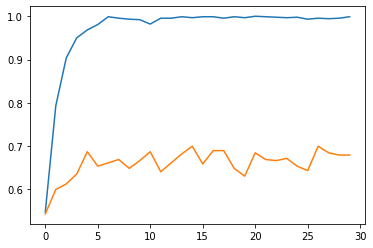

In [37]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

In [17]:
y_pred=classifier.predict(test_set)

In [62]:
pred_value=[int(round(p[0])) for p in y_pred]

In [60]:
import math

In [63]:
pred_value

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1]

In [64]:
test_set

In [65]:
classifier.save('Beard_style.h5')

In [41]:
from keras.models import load_model
from keras.preprocessing import image

In [42]:
x=image.load_img("Dataset/Test/Full Beard/38.jpg",target_size=(64,64))

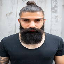

In [43]:
x

In [44]:
x=image.img_to_array(x)

In [45]:
x

array([[[170., 170., 170.],
        [174., 174., 174.],
        [194., 195., 197.],
        ...,
        [202., 205., 210.],
        [202., 202., 204.],
        [191., 191., 193.]],

       [[182., 182., 182.],
        [177., 177., 177.],
        [193., 194., 196.],
        ...,
        [205., 208., 213.],
        [205., 205., 207.],
        [195., 195., 197.]],

       [[184., 184., 184.],
        [173., 173., 173.],
        [200., 201., 203.],
        ...,
        [212., 215., 220.],
        [208., 208., 210.],
        [197., 197., 199.]],

       ...,

       [[154., 119.,  99.],
        [189., 153., 129.],
        [190., 152., 129.],
        ...,
        [217., 166., 135.],
        [229., 174., 135.],
        [236., 181., 142.]],

       [[114.,  92.,  81.],
        [131., 102.,  86.],
        [136., 105.,  85.],
        ...,
        [209., 154., 124.],
        [221., 162., 122.],
        [228., 169., 129.]],

       [[ 91.,  81.,  82.],
        [118.,  89.,  75.],
        [161., 1

In [46]:
x.shape

(64, 64, 3)

In [47]:
x=x/225

In [48]:
x=x.reshape(1,64,64,3)

In [49]:
x.shape

(1, 64, 64, 3)

In [50]:
model=load_model('Beard_style.h5')

In [51]:
pred=model.predict(x)

In [52]:
predicted_val = [int(round(p[0])) for p in pred]

In [53]:
predicted_val

[1]

In [62]:
x=image.load_img("Dataset/Test/Clean Shaven/37.jpg",target_size=(64,64))

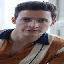

In [63]:
x

In [64]:
x=image.img_to_array(x)

In [65]:
x=x/225

In [66]:
x=x.reshape(1,64,64,3)

In [67]:
new=model.predict(x)

In [68]:
predicted_val = [int(round(p[0])) for p in new]

In [69]:
predicted_val

[1]